 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [58]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [59]:
# Reading whale returns
whale_returns_csv = Path("Resources","whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True)
whale_returns_df.sort_index()
whale_returns_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [60]:
# Count nulls
null_counts = whale_returns_df.isnull().sum()
null_counts 

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [61]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [62]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources","algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True)
algo_returns_df.sort_index()
algo_returns_df.head(5)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [63]:
# Count nulls
null_counts = algo_returns_df.isnull().sum()

In [64]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [65]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csv = Path("Resources","sp_tsx_history.csv")
sp_tsx_history_df = pd.read_csv(sp_tsx_history_csv, index_col="Date", parse_dates=True)
sp_tsx_history_df.sort_index()
sp_tsx_history_df.head(10)

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
2012-10-09,"$12,273.57"
2012-10-10,"$12,212.42"
2012-10-11,"$12,233.95"
2012-10-12,"$12,202.04"


In [66]:
# Check Data Types
print(sp_tsx_history_df.dtypes)


Close    object
dtype: object


In [67]:
# Fix Data Types
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].replace('[\$,]', '', regex=True).astype(float)

In [68]:
# Calculate Daily Returns
sp_tsx_returns = sp_tsx_history_df['Close'].pct_change()


In [69]:
# Drop nulls
sp_tsx_returns=sp_tsx_returns.dropna()

In [70]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns.name = 'S&P TSX 60'

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [71]:
portfolio_returns = pd.concat([whale_returns_df, algo_returns_df, sp_tsx_returns], axis="columns", join="inner")
portfolio_returns = portfolio_returns.sort_index()
portfolio_returns.tail(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,0.002548
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.004145
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.002139
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.005557
2019-04-24,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399,-0.004972
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,-0.001183


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

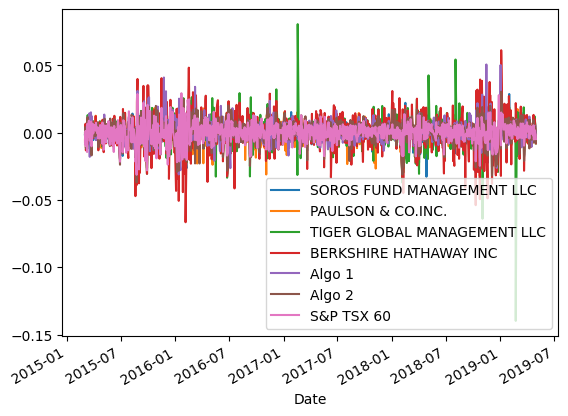

In [72]:
# Plot daily returns of all portfolios
portfolio_returns.plot()

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Returns of All Portfolios'}, xlabel='Date'>

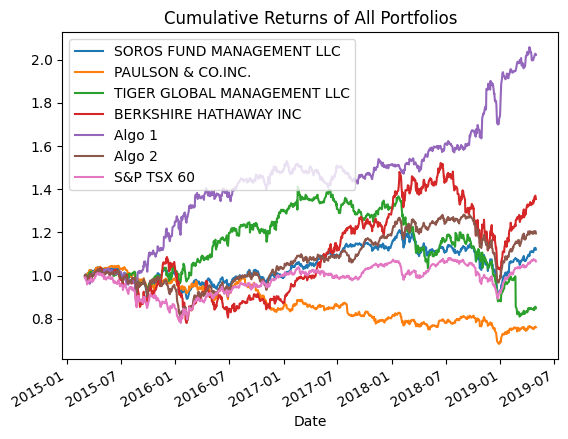

In [73]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + portfolio_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(title="Cumulative Returns of All Portfolios")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


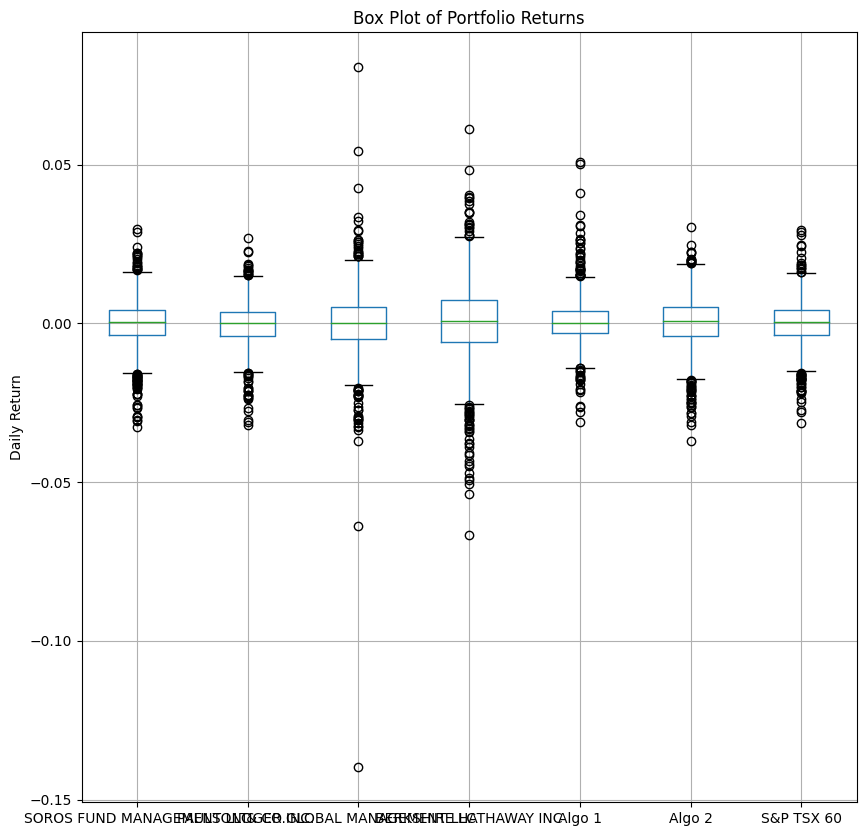

In [74]:
# Box plot to visually show risk
import matplotlib.pyplot as plt

# Create a box plot
portfolio_returns.boxplot(figsize=(10,10))
plt.title('Box Plot of Portfolio Returns')
plt.ylabel('Daily Return')
plt.show()

### Calculate Standard Deviations

In [75]:
# Calculate the daily standard deviations of all portfolios
portfolio_std = portfolio_returns.std()


### Determine which portfolios are riskier than the S&P TSX 60

In [76]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_std = sp_tsx_returns.std()

# Determine which portfolios are riskier than the S&P TSX 60

riskier_portfolios = {}

# Calculate the standard deviation of all portfolios
portfolio_std = portfolio_returns.std()

# Iterate over the portfolios
for portfolio in portfolio_std.index:
    # If the portfolio's standard deviation is greater than that of the S&P TSX 60
    if portfolio_std[portfolio] > sp_tsx_std:
        riskier_portfolios[portfolio] = portfolio_std[portfolio]

# Convert the dictionary to a DataFrame for better visualization
riskier_portfolios_df = pd.DataFrame(list(riskier_portfolios.items()),columns = ['Portfolio','Std Dev'])

print(riskier_portfolios_df)

                     Portfolio   Std Dev
0    SOROS FUND MANAGEMENT LLC  0.007828
1           PAULSON & CO.INC.   0.006982
2  TIGER GLOBAL MANAGEMENT LLC  0.010883
3       BERKSHIRE HATHAWAY INC  0.012826
4                       Algo 1  0.007589
5                       Algo 2  0.008326
6                   S&P TSX 60  0.007034


### Calculate the Annualized Standard Deviation

In [77]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = portfolio_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX 60                     0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': 'Rolling 21-Day Standard Deviation of Portfolios'}, xlabel='Date'>

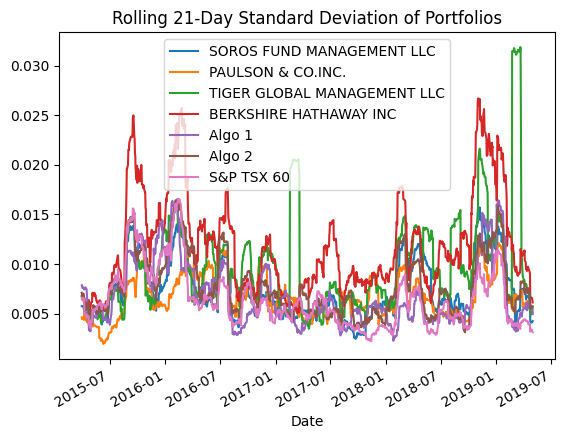

In [78]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = portfolio_returns.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(title='Rolling 21-Day Standard Deviation of Portfolios')


### Calculate and plot the correlation

In [79]:
import seaborn as sns

<Axes: >

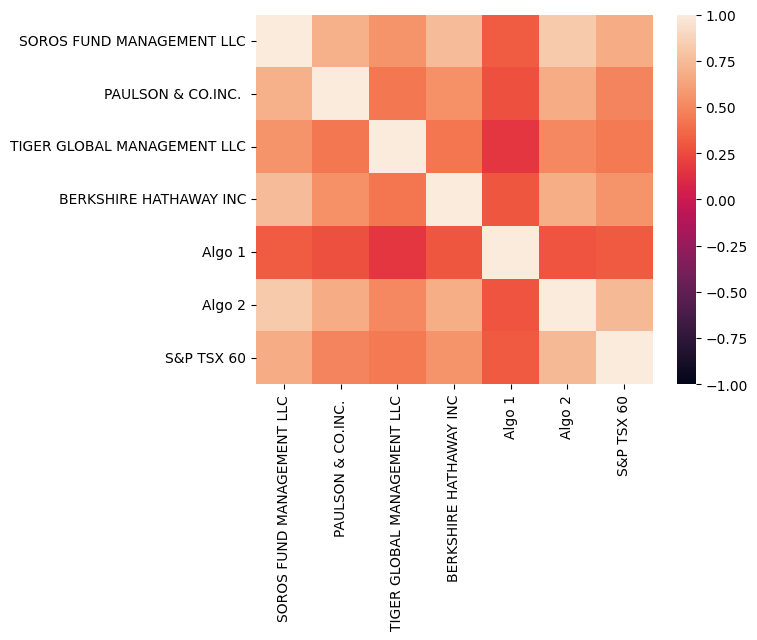

In [80]:
# Calculate the correlation
correlation_matrix = portfolio_returns.corr()

# Display de correlation matrix
sns.heatmap(correlation_matrix, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<Axes: title={'center': 'Rolling Beta'}, xlabel='Date'>

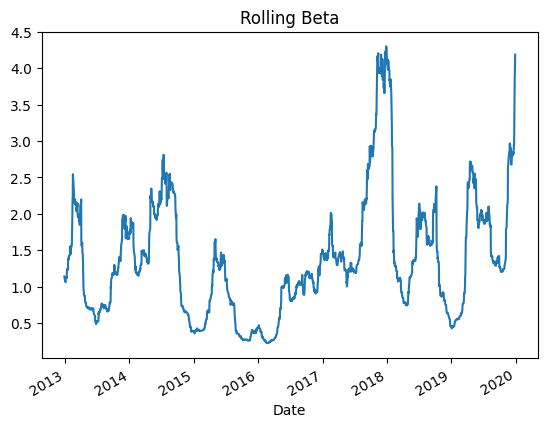

In [81]:
# Calculate covariance of a single portfolio
rolling_covariance = portfolio_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(sp_tsx_returns)
# Calculate variance of S&P TSX

rolling_variance = sp_tsx_returns.rolling(window=60).var()

# Computing beta
rolling_beta = rolling_covariance.mean() / rolling_variance

# Plot beta trend

rolling_beta.plot(title='Rolling Beta')



## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

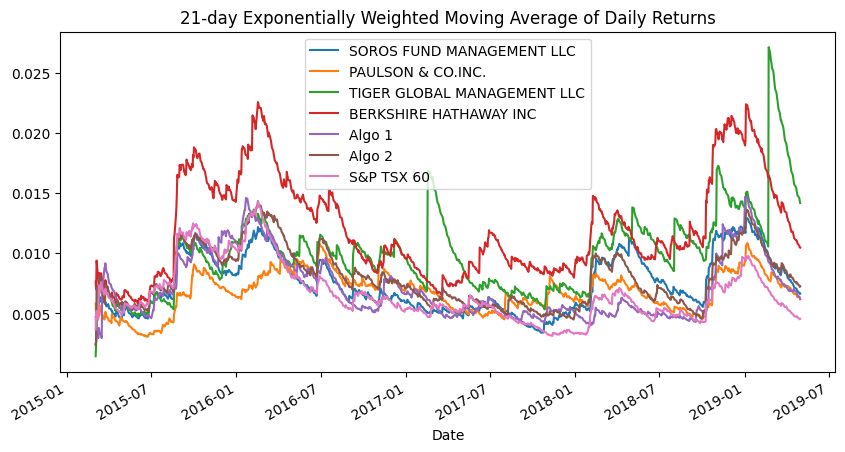

In [82]:
# Use `ewm` to calculate the rolling window
ewm_21 = portfolio_returns.ewm(halflife=21).std()
ewm_21.plot(figsize=(10,5), title='21-day Exponentially Weighted Moving Average of Daily Returns')
plt.show()


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [85]:
# Annualized Sharpe Ratios

sharpe_ratios = (portfolio_returns.mean()* 252) / (portfolio_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

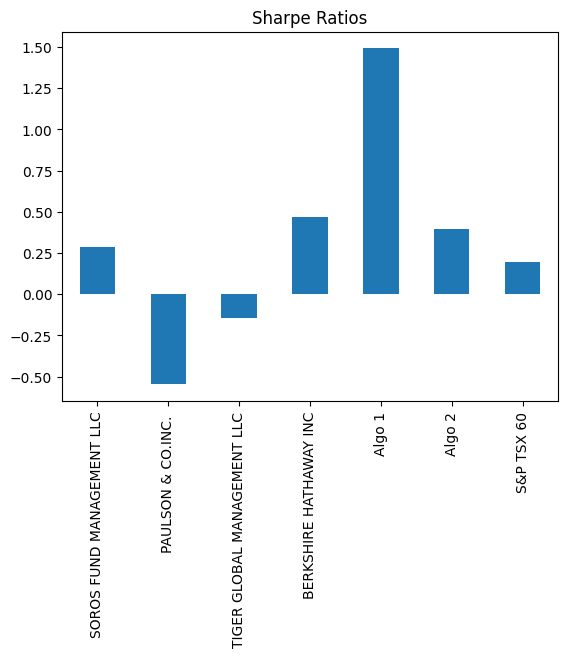

In [86]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

if the algorithmic strategies have higher Sharpe ratios compared to the other portfolios, it suggests that they are generating higher returns for the same level of risk, or the same returns for a lower level of risk. Similarly, when comparing returns alone, if the algorithmic strategies have higher returns than the other portfolios, they are outperforming. However, this higher return could come with higher risk, which is where the Sharpe ratio becomes useful as it considers both return and risk together.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [87]:
# Reading data from 1st stock
aapl_csv = Path("Resources","aapl_historical.csv")
aapl_historical = pd.read_csv(aapl_csv, index_col="Date", parse_dates=True)
aapl_historical.index = pd.to_datetime(aapl_historical.index)
aapl_historical.sort_index()
aapl_historical.sample(5)

,Symbol,Close
Date,,
2014-04-07,AAPL,18.70
2023-05-08,AAPL,173.50
2021-09-10,AAPL,148.97
2021-10-12,AAPL,141.51
2021-09-02,AAPL,153.65


In [88]:
# Reading data from 2nd stock
jpm_csv = Path("Resources","jpm_historical .csv")   
jpm_historical = pd.read_csv(jpm_csv, index_col="Date", parse_dates=True)
jpm_historical.index = pd.to_datetime(jpm_historical.index)
jpm_historical.sort_index()
jpm_historical.head(10)

,Symbol,Close
Date,,
2012-01-03,JPM,34.98
2012-01-04,JPM,34.95
2012-01-05,JPM,35.68
2012-01-06,JPM,35.36
2012-01-09,JPM,35.30
2012-01-10,JPM,36.05
2012-01-11,JPM,36.66
2012-01-12,JPM,36.85
2012-01-13,JPM,35.92


In [89]:
# Reading data from 3rd stock
wmt_csv = Path("Resources","wmt_historical .csv")
wmt_historical = pd.read_csv(wmt_csv, index_col="Date", parse_dates=True)
wmt_historical.index = pd.to_datetime(wmt_historical.index)
wmt_historical.sort_index()
wmt_historical.head(10)

,Symbol,Close
Date,,
2012-01-03,WMT,60.33
2012-01-04,WMT,59.71
2012-01-05,WMT,59.42
2012-01-06,WMT,59.00
2012-01-09,WMT,59.18
2012-01-10,WMT,59.04
2012-01-11,WMT,59.40
2012-01-12,WMT,59.50
2012-01-13,WMT,59.54


In [90]:
# Combine all stocks in a single DataFrame
all_prices = pd.concat([wmt_historical, jpm_historical, aapl_historical], axis="rows", join="inner")
all_prices.sample(10)

,Symbol,Close
Date,,
2014-12-11,JPM,61.14
2021-01-14,AAPL,128.91
2015-04-22,WMT,78.43
2018-06-14,WMT,83.79
2018-02-26,AAPL,44.74
2016-04-06,WMT,69.04
2018-06-08,JPM,111.11
2014-06-30,JPM,57.62
2020-05-18,AAPL,78.74


In [91]:
# Reset Date index
all_prices = all_prices.reset_index()
all_prices.sample(20)

,Date,Symbol,Close
2356,2021-05-14,WMT,139.52
2694,2012-04-20,JPM,42.72
4276,2018-08-03,JPM,117.09
2740,2012-06-26,JPM,35.71
1346,2017-05-10,WMT,76.70
6514,2016-02-01,AAPL,24.11
5296,2022-08-23,JPM,115.52
1319,2017-03-31,WMT,72.08
5195,2022-03-29,JPM,141.18
3906,2017-02-14,JPM,89.56


In [92]:
# Reorganize portfolio data by having a column per symbol
all_prices = all_prices.pivot_table(values="Close", index="Date", columns="Symbol")


In [93]:
# Calculate daily returns
all_returns = all_prices.pct_change()

# Drop NAs
all_returns.dropna(inplace=True)
# Display sample data
all_returns.sample(10)

Symbol,AAPL,JPM,WMT
Date,,,
2019-03-13,0.004422,0.003364,0.006709
2012-03-02,0.001028,0.006440,0.003230
2016-08-23,0.002949,-0.000456,-0.010041
2019-11-01,0.028461,0.023055,0.003070
2012-05-15,-0.009027,0.012573,0.004740
2016-03-15,0.020289,0.001353,0.010837
2013-07-15,0.002626,-0.001455,-0.007729
2017-01-25,0.016005,0.015463,-0.007567
2019-01-22,-0.022443,-0.015776,-0.002456


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [94]:
# Set weights
weights = [1/3, 1/3, 1/3]


# Calculate portfolio return
custom_portfolio_returns=all_returns.dot(weights)
# Display sample data
custom_portfolio_returns.head()

Date
2012-01-04   -0.001896
2012-01-05    0.008954
2012-01-06   -0.001773
2012-01-09   -0.000211
2012-01-10    0.007622
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [95]:
# Join your returns DataFrame to the original returns DataFrame
All_returns = pd.concat([all_returns,portfolio_returns], axis="columns", join="outer")
All_returns.head(10)

,AAPL,JPM,WMT,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,,,,
2012-01-04,0.005446,-0.000858,-0.010277,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,0.010833,0.020887,-0.004857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,0.010717,-0.008969,-0.007068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,-0.001988,-0.001697,0.003051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,0.003984,0.021246,-0.002366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,-0.001984,0.016921,0.006098,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-12,-0.002651,0.005183,0.001684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-13,-0.003987,-0.025237,0.000672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-17,0.012008,-0.028118,0.005207,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
All_returns.dropna(inplace=True)
All_returns.head()

,AAPL,JPM,WMT,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,,,,
2015-03-03,0.002169,0.003238,-0.007027,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,-0.006184,0.002582,-0.009476,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,-0.016801,-0.002092,0.011988,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,0.001582,-0.017903,-0.011727,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.004423,0.010018,0.003511,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [97]:
# Calculate the annualized `std`
All_returns_std = All_returns.std()
annualized_std_1 = All_returns_std * np.sqrt(252)
annualized_std_1 

AAPL                           0.246181
JPM                            0.212582
WMT                            0.201909
SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX 60                     0.111664
dtype: float64

### Calculate and plot rolling `std` with 21-day window

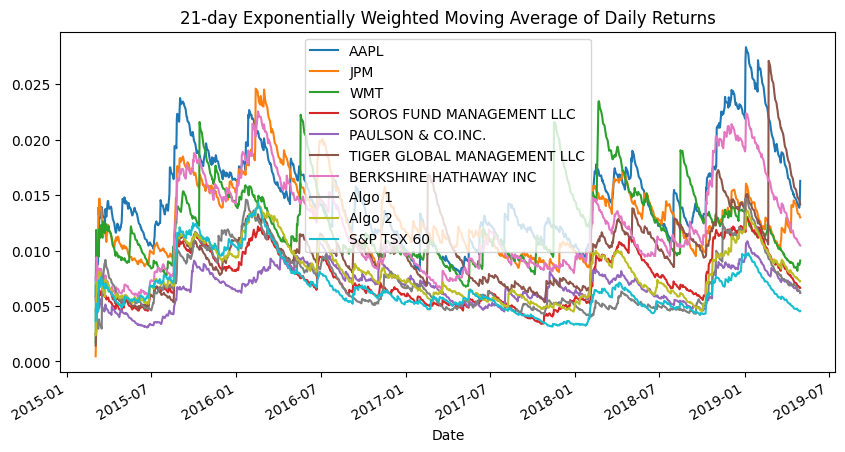

In [98]:
# Calculate rolling standard deviation
ewm_21 = All_returns.ewm(halflife=21).std()


# Plot rolling standard deviation
ewm_21.plot(figsize=(10,5), title='21-day Exponentially Weighted Moving Average of Daily Returns')
plt.show()

### Calculate and plot the correlation

<Axes: >

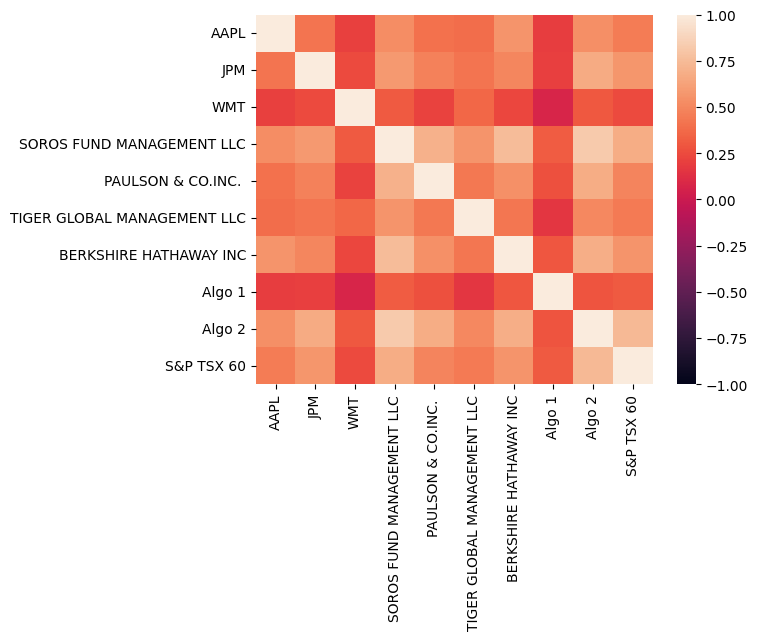

In [99]:
# Calculate and plot the correlation
correlation = All_returns.corr()
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

<Axes: title={'center': 'Rolling Beta'}, xlabel='Date'>

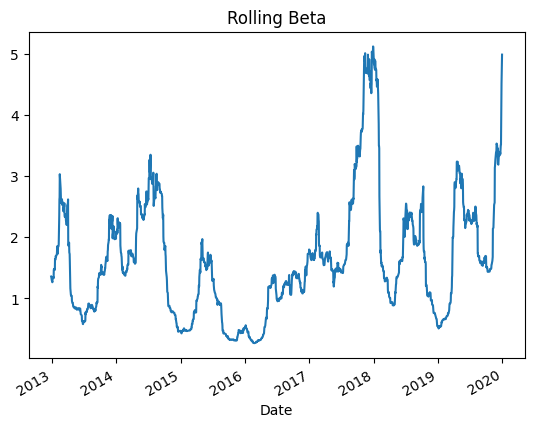

In [100]:
# Calculate and plot Beta
rolling_covariance = All_returns['AAPL'].rolling(window=60).cov(sp_tsx_returns)
# Calculate variance of S&P TSX

rolling_variance = sp_tsx_returns.rolling(window=60).var()

# Computing beta
rolling_beta = rolling_covariance.mean() / rolling_variance

# Plot beta trend

rolling_beta.plot(title='Rolling Beta')


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [101]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_1 = (All_returns.mean()* 252) / (All_returns.std() * np.sqrt(252))
sharpe_ratios_1 

AAPL                           0.489420
JPM                            0.743493
WMT                            0.193691
SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

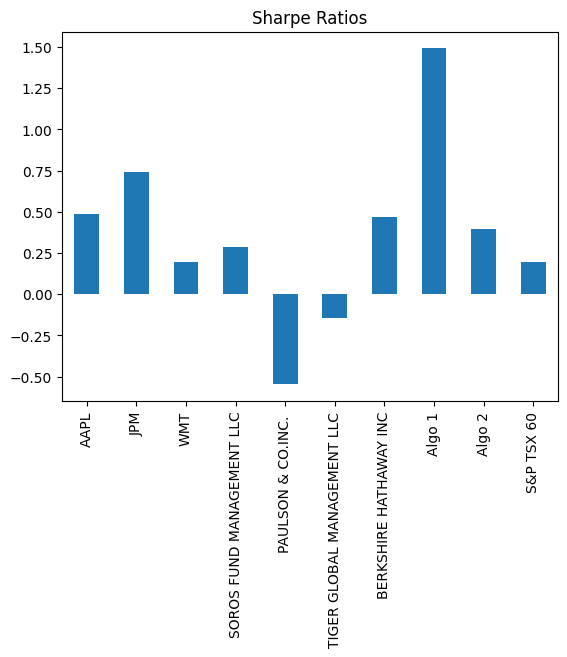

In [102]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_1.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?


The portfolio showed a commendable balance between risk and return over the review period. Its constituents facilitated a synergy of diversification, evidenced by the moderate risk profile and competitive risk-adjusted returns. It's worth noting that the portfolio's performance does not guarantee future results, and ongoing monitoring and periodic rebalancing are essential to maintain or enhance its performance.

Considering individual risk tolerance, investment goals, and time horizons is critical when interpreting these metrics. The portfolio's performance should ideally be aligned with the investor's financial objectives and market expectations.

Recommendations for potential adjustments to the portfolio composition would require a comprehensive understanding of the investor's current financial situation, risk appetite, and investment horizon.